# (08) Rebuttal Fig -- Pi (```KABA```)

**Motivation**: This includes every plot that requires some form of memberships plotted. Namely:

1. HRF filtered CA: ```supplementary```
2. Awake (group of 5): ```supplementary```
3. Unfiltered CA: ```rebuttal```
4. Full membership range (used for the all bins figure): ```rebuttal```

<br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
# HIDE CODE


def default_props_anesth(
        num_k: int = 7,
        perc: int = 15,
        **kwargs, ):
    mice = Mice(512)
    props_base = {
        'mice': mice,
        'num_k': num_k,
        'task': 'rest',
        'perc': f'p{perc}-sample',
        'metric': 'pearson',
        'sv_props': {
            'match_using': 'gam',
            'match_metric': 'euclidean'},
        'graph_type': 'real',
        'kw_kmeans': {'n_init': 100},
        'verbose': False,
    }
    kwargs = setup_kwargs(props_base, kwargs)
    props_ca = {'mode': 'ca2', **kwargs}
    return mice, props_ca

## Mice

In [3]:
mice, props = default_props_anesth()
kws_show = show_kws(props['num_k'])
bs = Base(mice, mode='ca2')

translation = {'BOLD': BOLD, 'CAS': CAS, 'CAF': CAF}
kws_fig = dict(bbox_inches='tight', dpi=300, transparent=True)
fig_dir = pjoin(fig_base_dir, 'rebuttal', 'memberships')
print(fig_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal/memberships

## 1. HRF

In [4]:
pi = np.load(pjoin(tmp_dir, 'memberships.npy'), allow_pickle=True).item()
pi_avg = np.load(pjoin(tmp_dir, 'memberships_avg.npy'), allow_pickle=True).item()

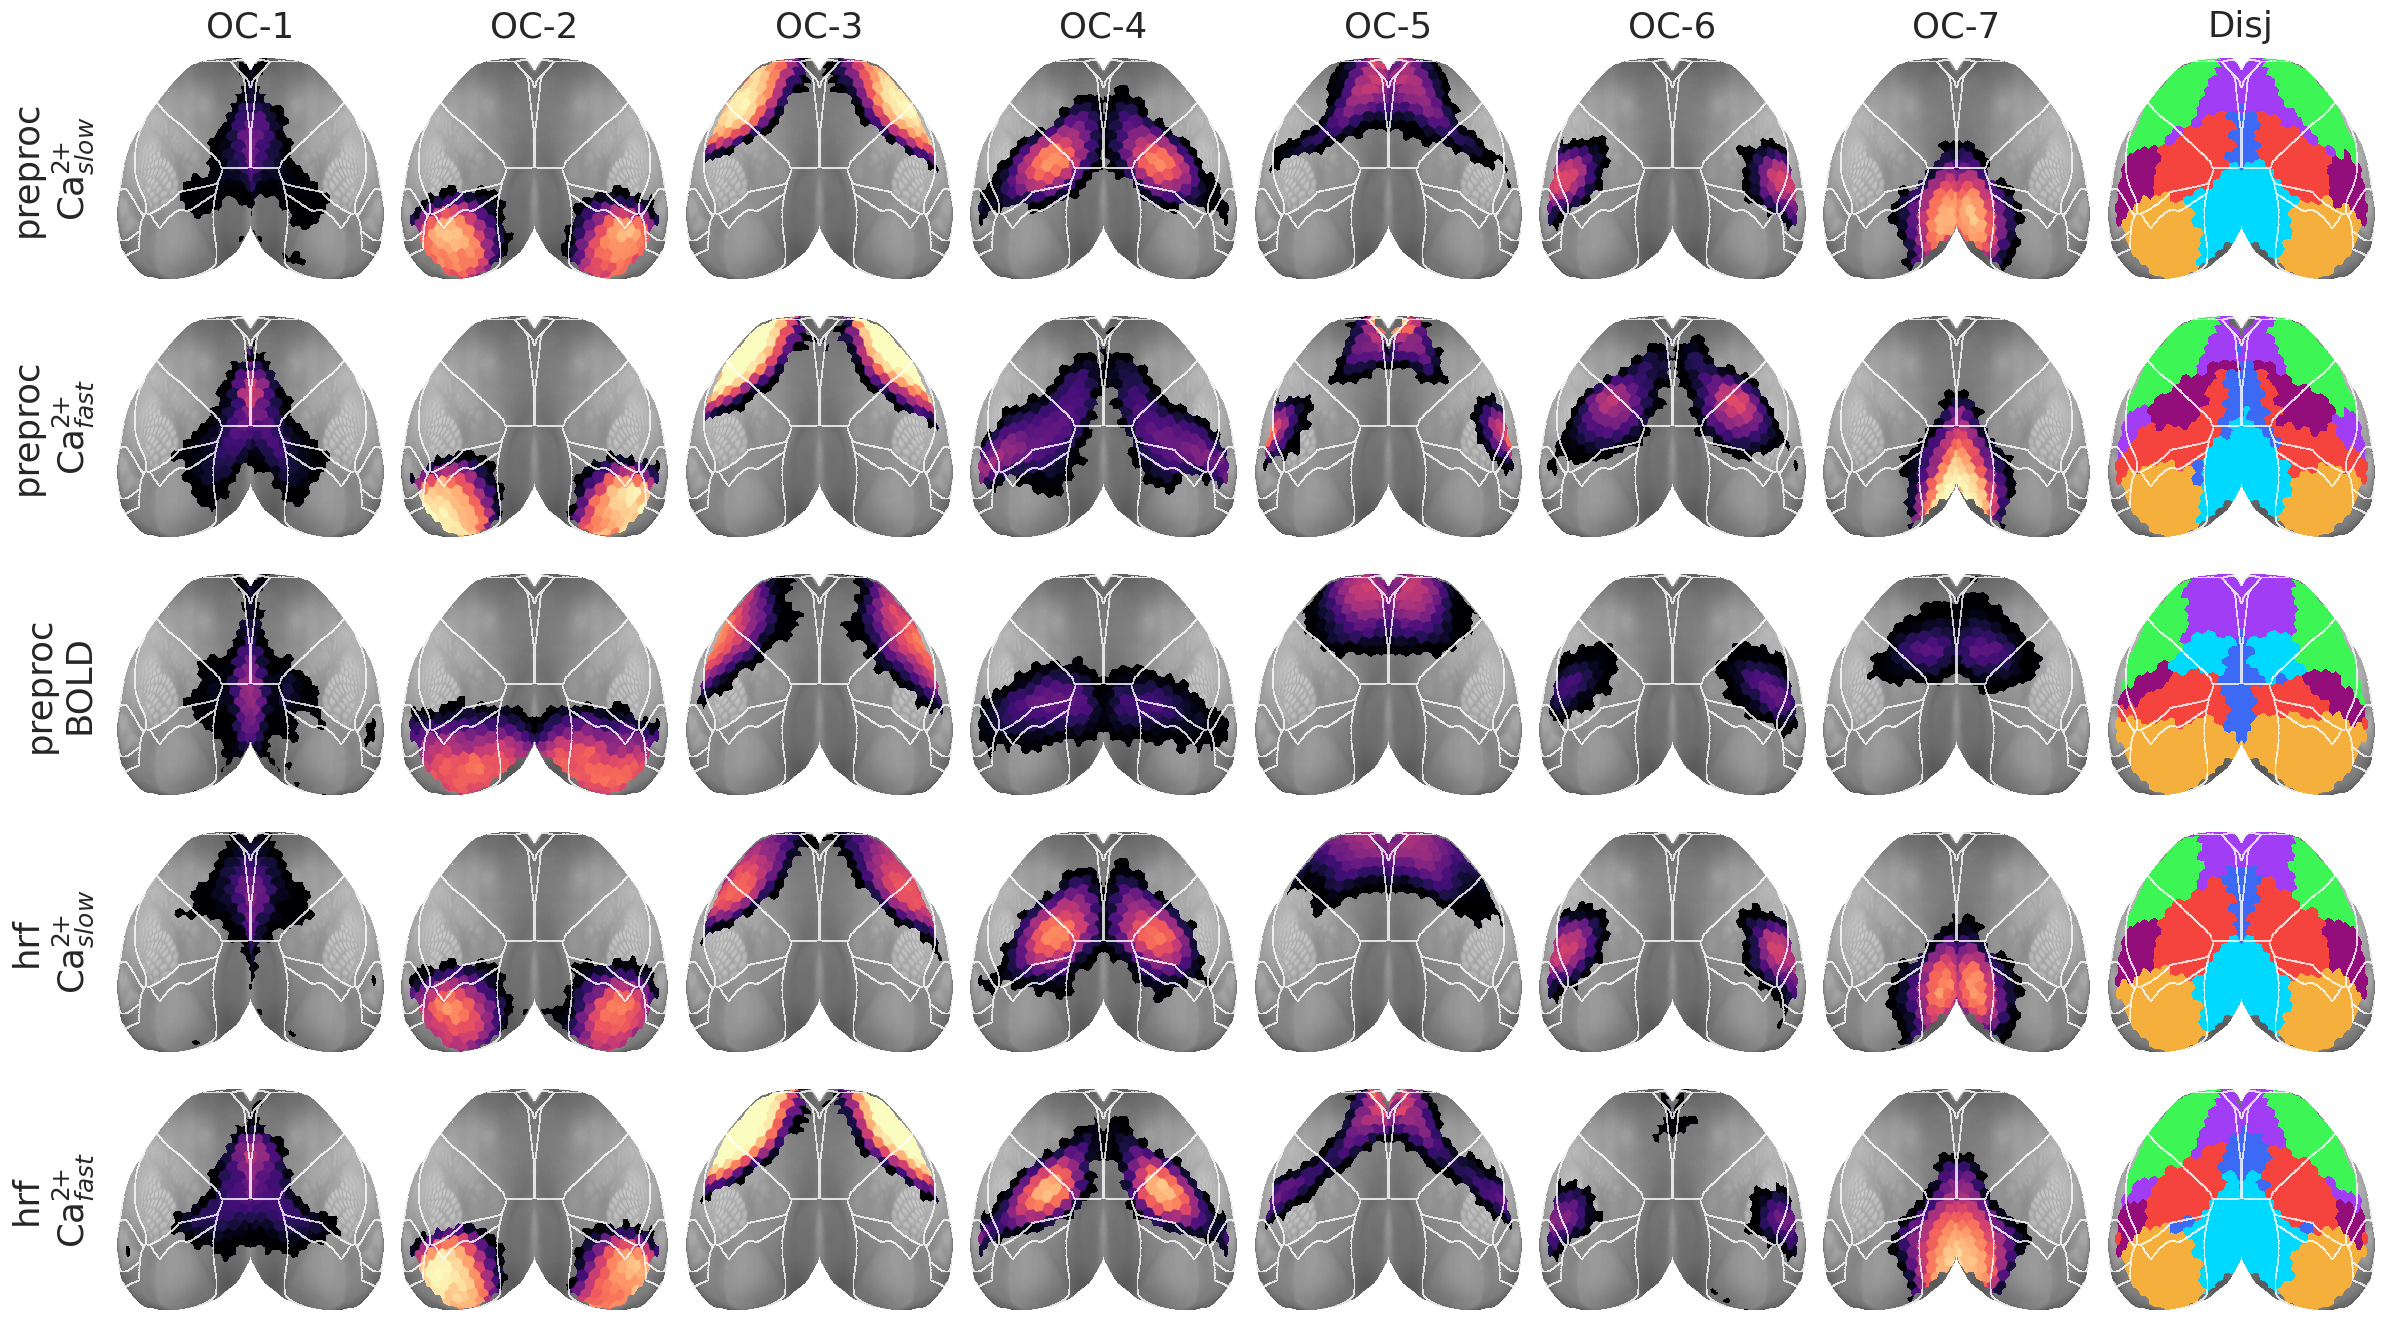

In [5]:
fig, axes = bs.show(pi_avg, **kws_show)

In [6]:
pi_hrf = {k: v for k, v in pi_avg.items() if 'hrf' in k}

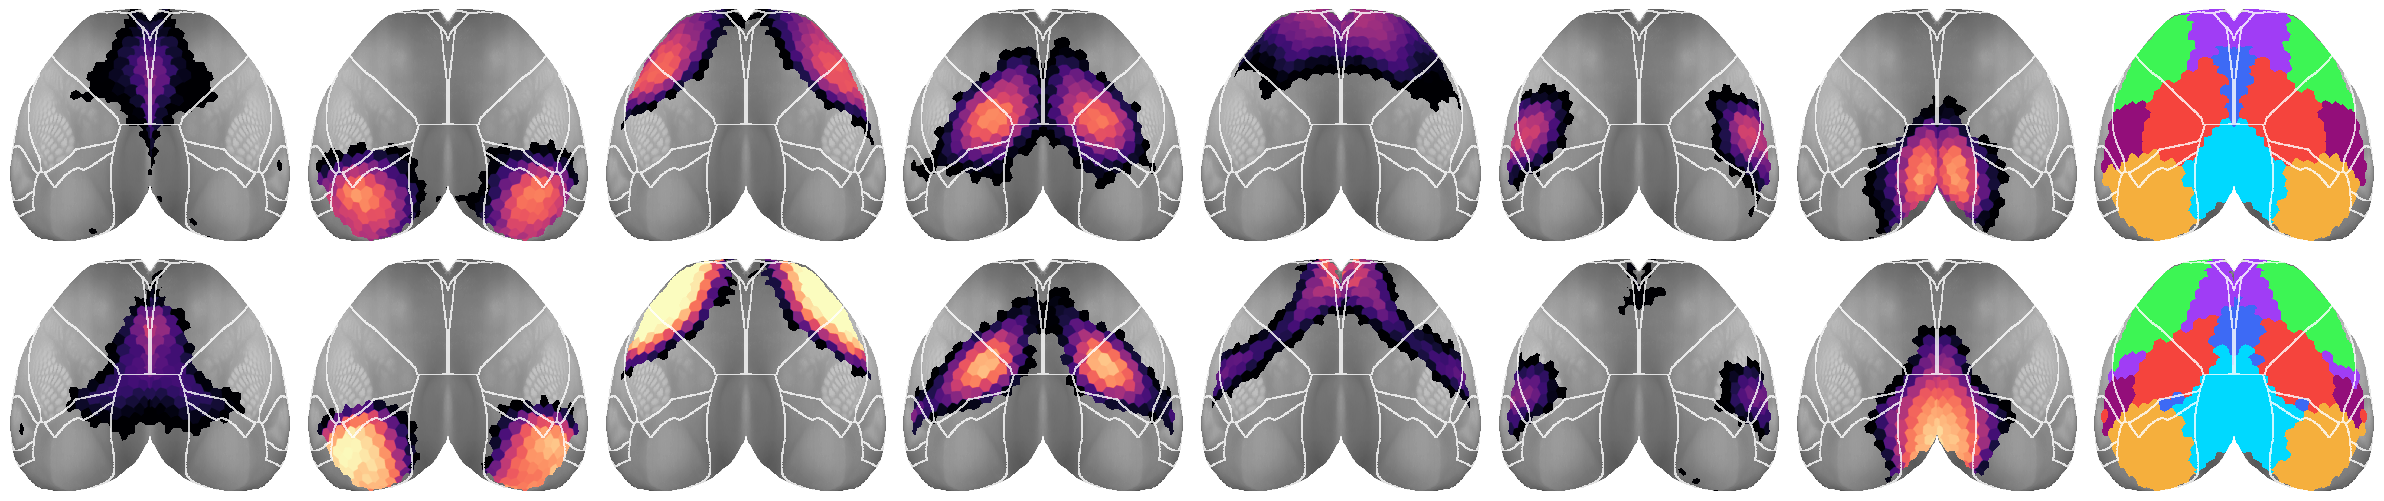

In [7]:
kws_show.update(dict(
    add_ylabels=False,
    titles=False,
    display=False,
))
fig, axes = bs.show(pi_hrf, **kws_show)

fig.savefig(pjoin(fig_dir, 'hrf_kaba.png'), **kws_fig)
display(fig)

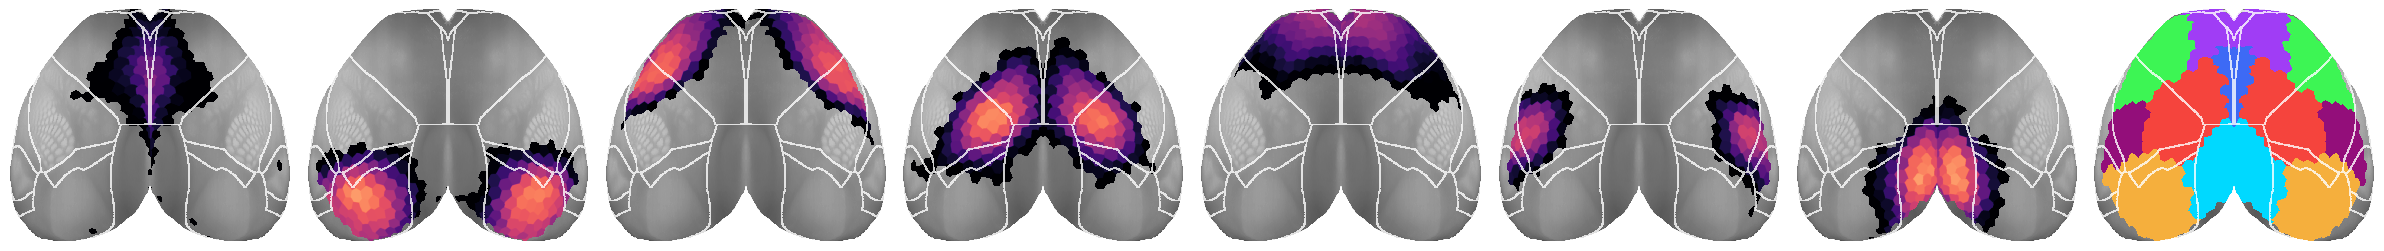

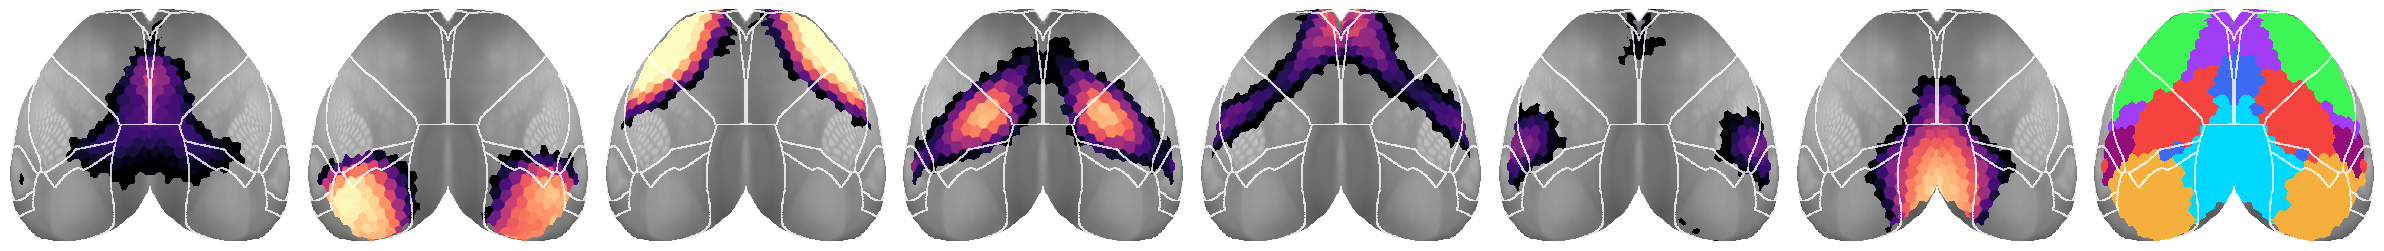

In [8]:
for label, mode in translation.items():
    if mode == BOLD:
        continue
    fig, axes = bs.show(pi_hrf[f"hrf\n{mode}"], **kws_show)
    fig.savefig(pjoin(fig_dir, f'hrf_kaba_{label}.png'), **kws_fig)
    display(fig)

## 2. Awake

In [4]:
pi_awake = np.load(
    pjoin(tmp_dir, 'memberships_awake_avg.npy'),
    allow_pickle=True,
).item()

pi_anesth_subset = np.load(
    pjoin(tmp_dir, 'memberships.npy'),
    allow_pickle=True,
).item()

pi_anesth_subset = {
    k: v[np.array([2, 6, 7, 9, 10]) - 1]
    for k, v in pi_anesth_subset.items()
    if 'preproc' in k and
    'BOLD' not in k
}

pi_combined = {
    **pi_anesth_subset,
    **pi_awake,
}

order = [
    f"preproc\n{CAS}", f"awake\n{CAS}",
    f"preproc\n{CAF}", f"awake\n{CAF}",
]
pi_combined = {k : pi_combined.get(k) for k in order}

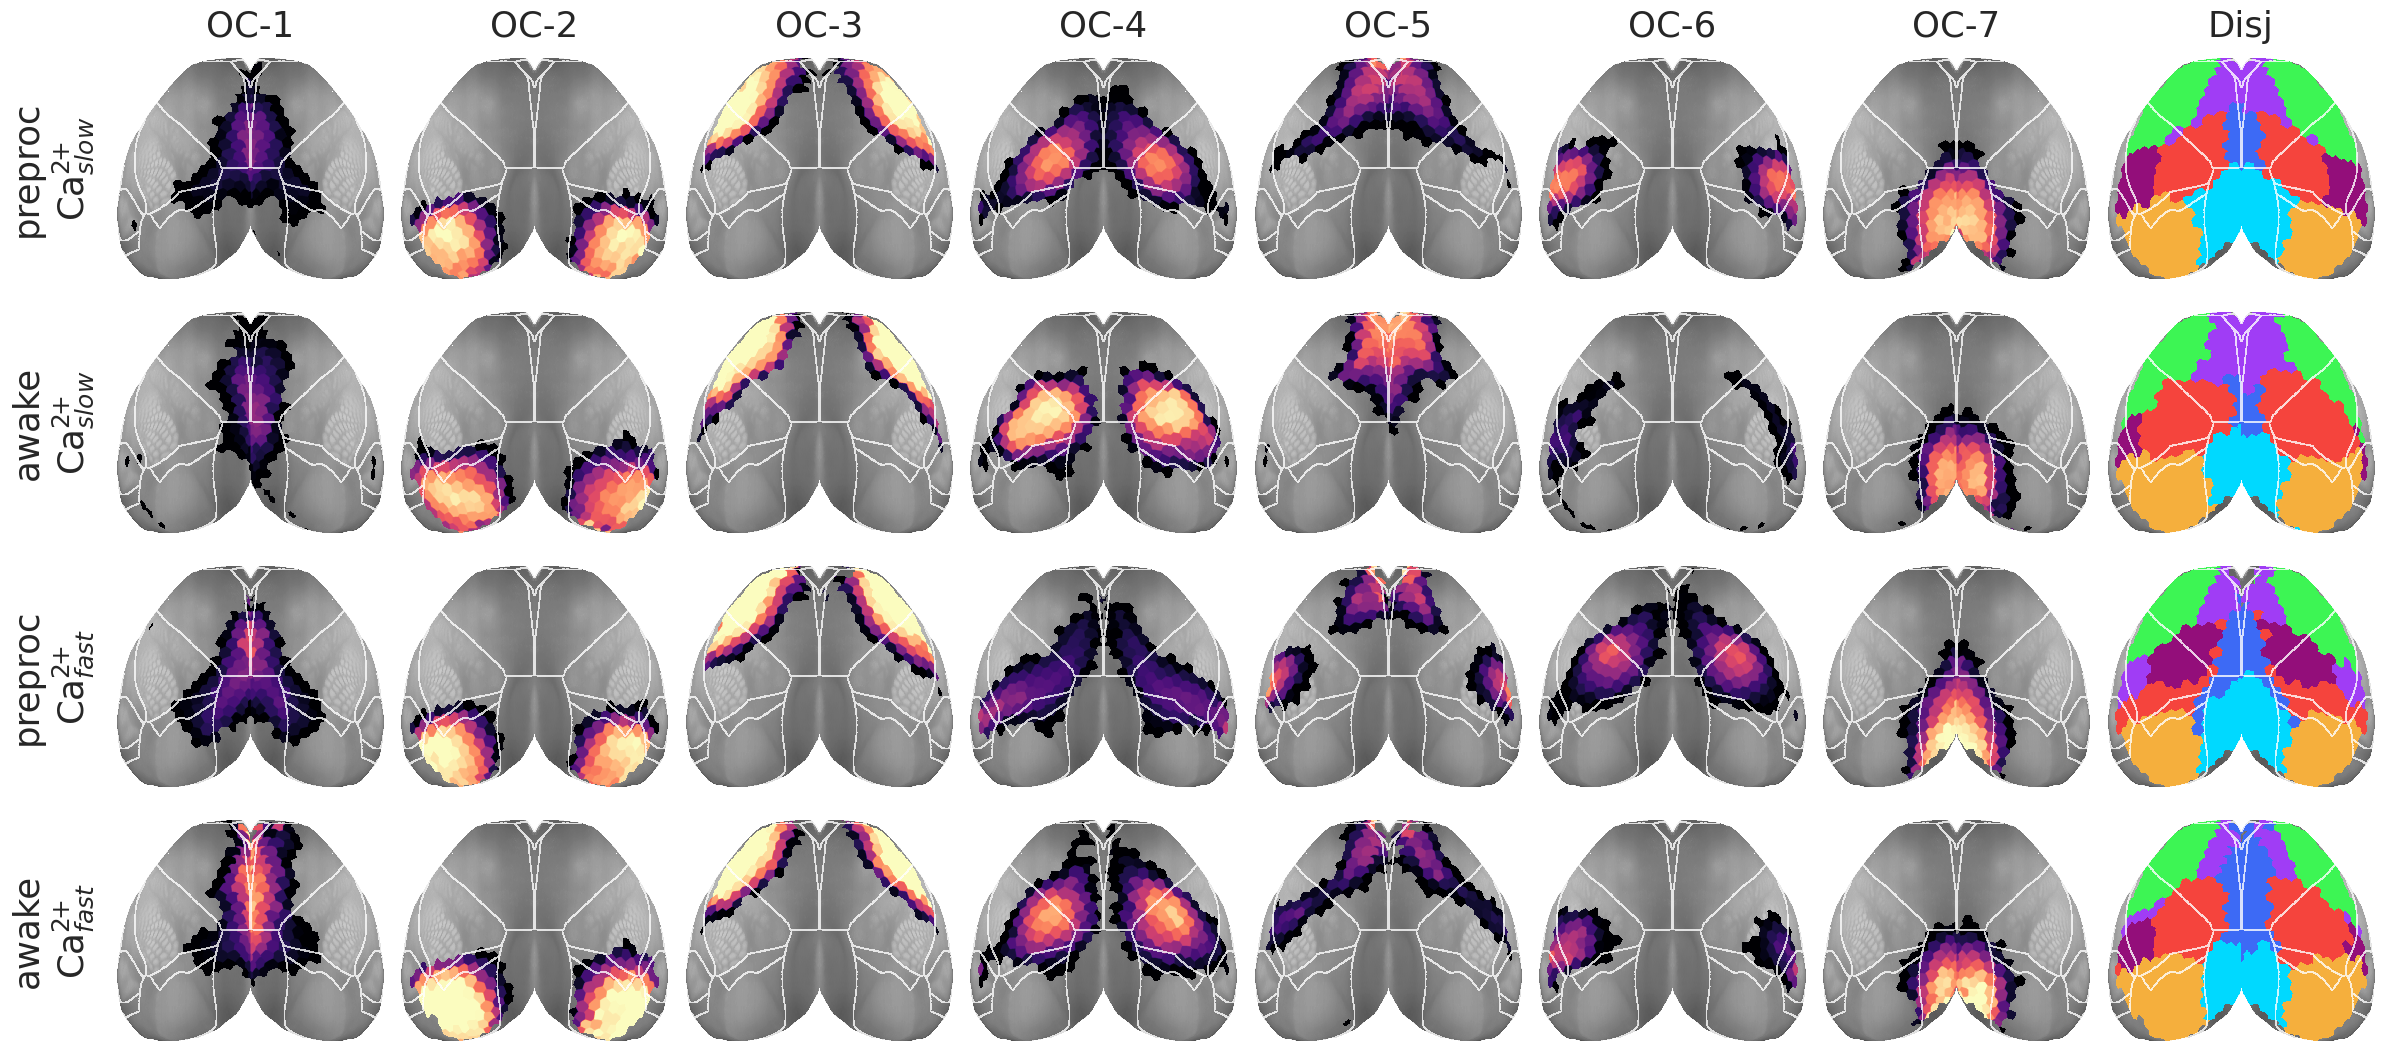

In [5]:
kws_show.update(dict(
    add_ylabels=True,
    titles=True,
    display=True,
))
fig, axes = bs.show(pi_combined, **kws_show)

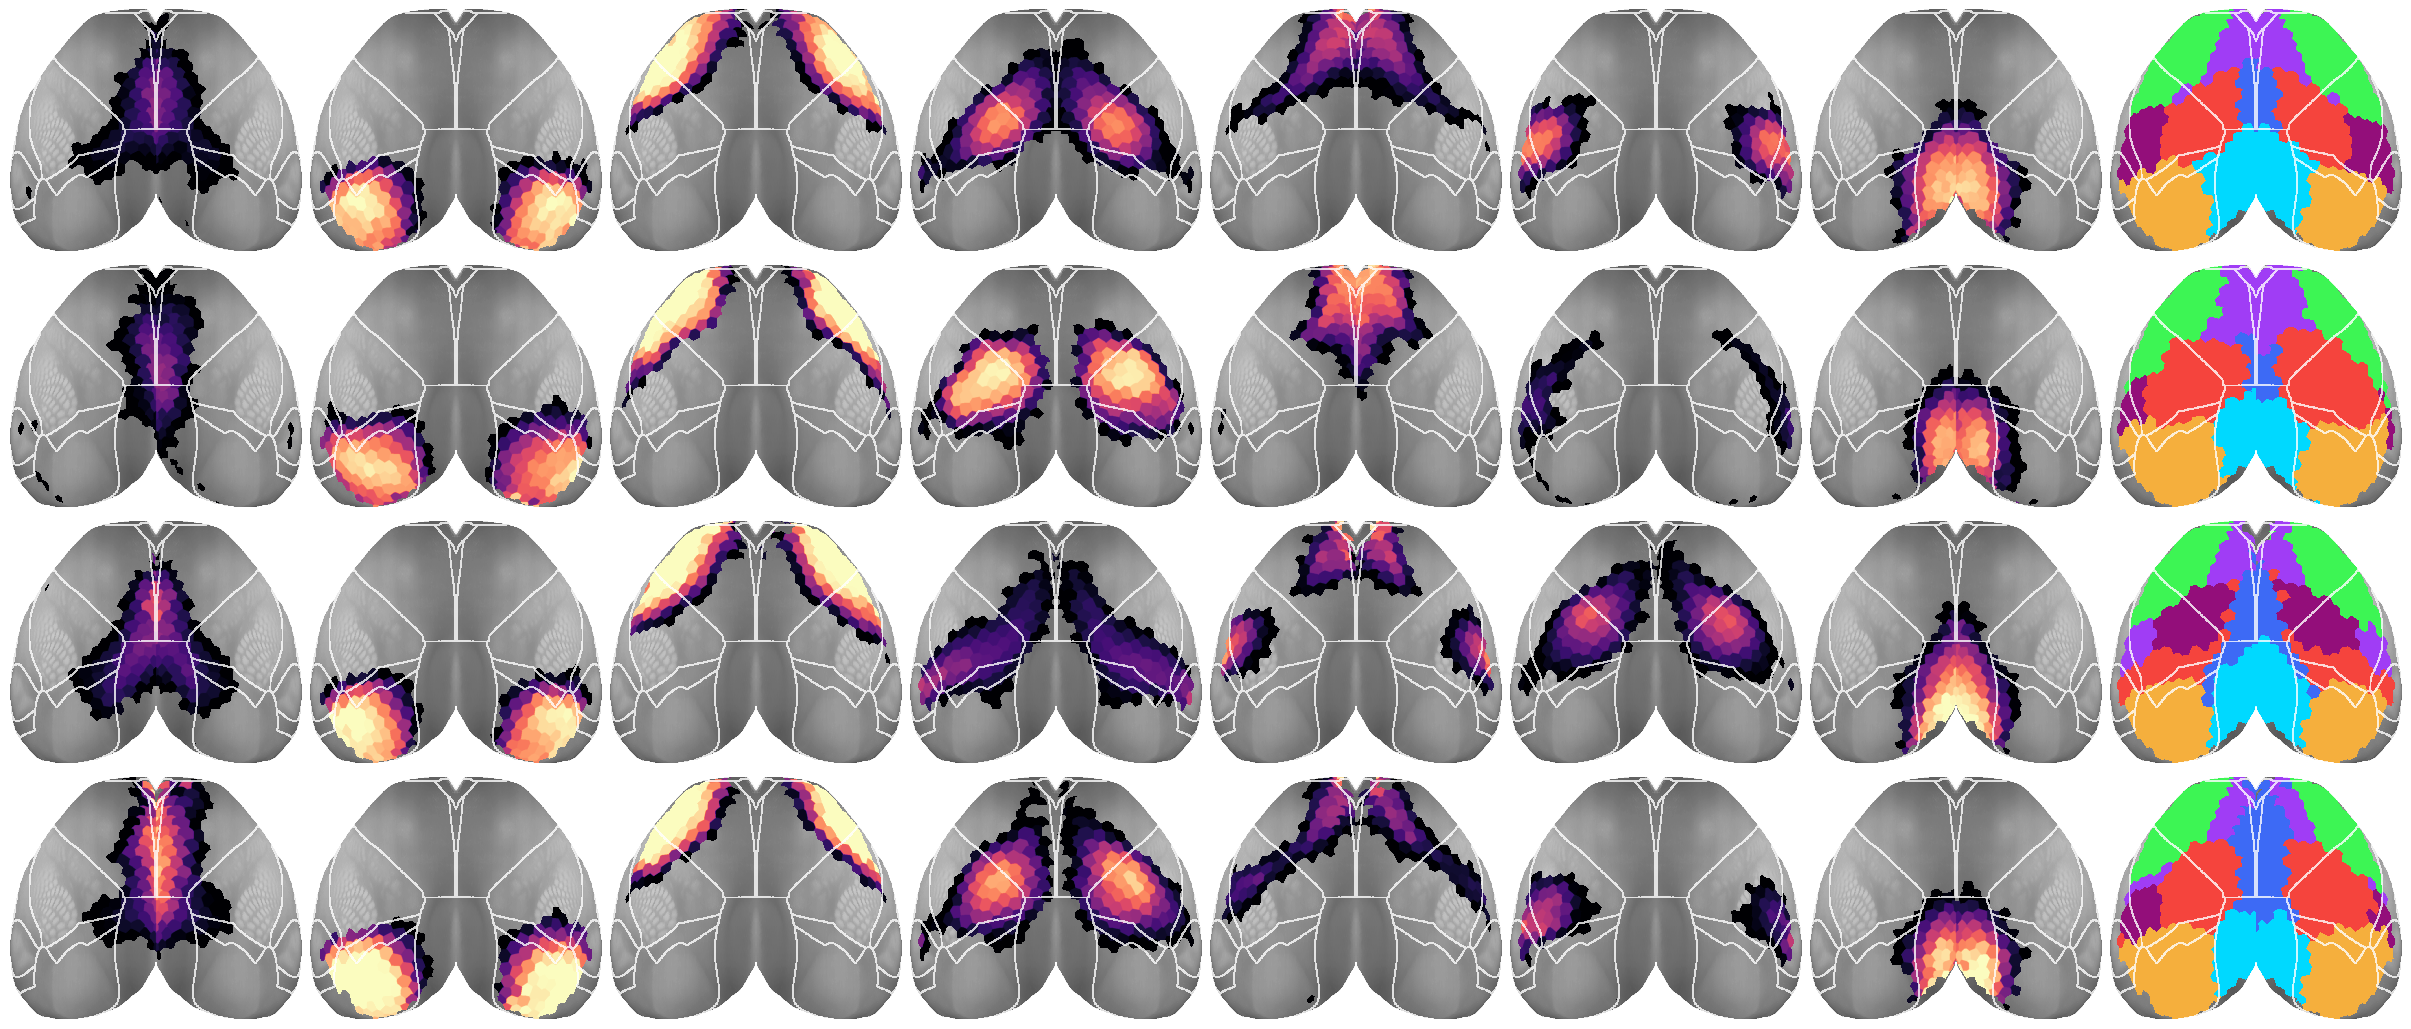

In [7]:
kws_show.update(dict(
    figsize_y=1.6,
    layout='constrained',
    add_ylabels=False,
    titles=False,
    display=False,
))
fig, axes = bs.show(pi_combined, **kws_show)

fig.savefig(pjoin(fig_dir, 'awake_kaba.png'), **kws_fig)
display(fig)

## 3. Unfiltered

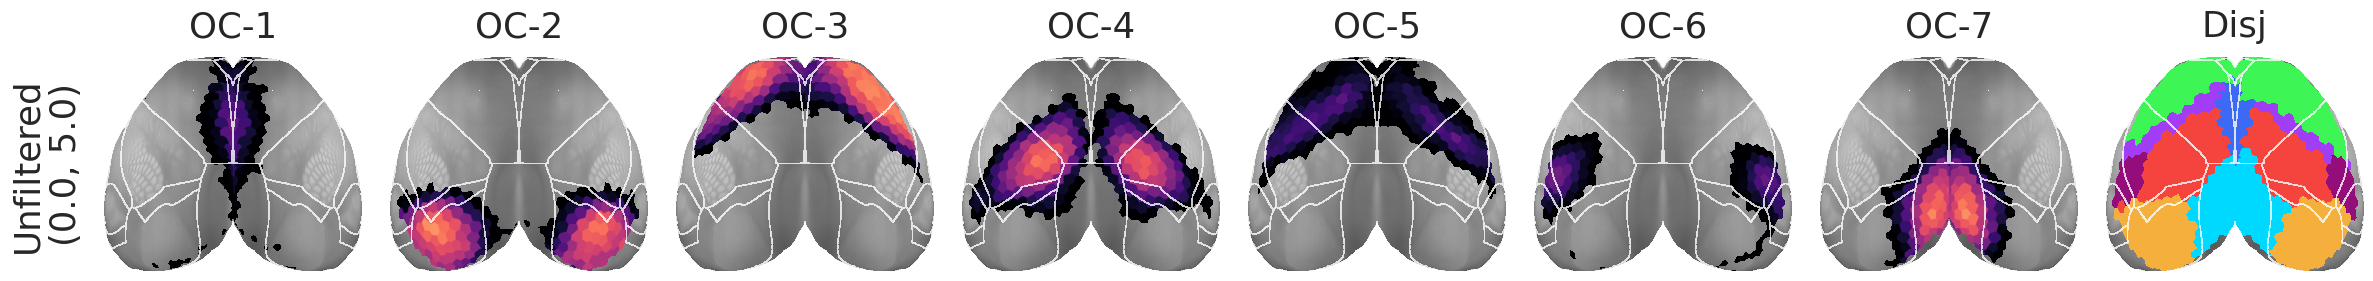

In [12]:
pi_unfiltered = np.load(
    pjoin(tmp_dir, 'memberships_unfiltered_avg.npy'),
    allow_pickle=True,
).item()

kws_show.update(dict(
    add_ylabels=True,
    titles=True,
    display=True,
))
fig, axes = bs.show(pi_unfiltered, **kws_show)

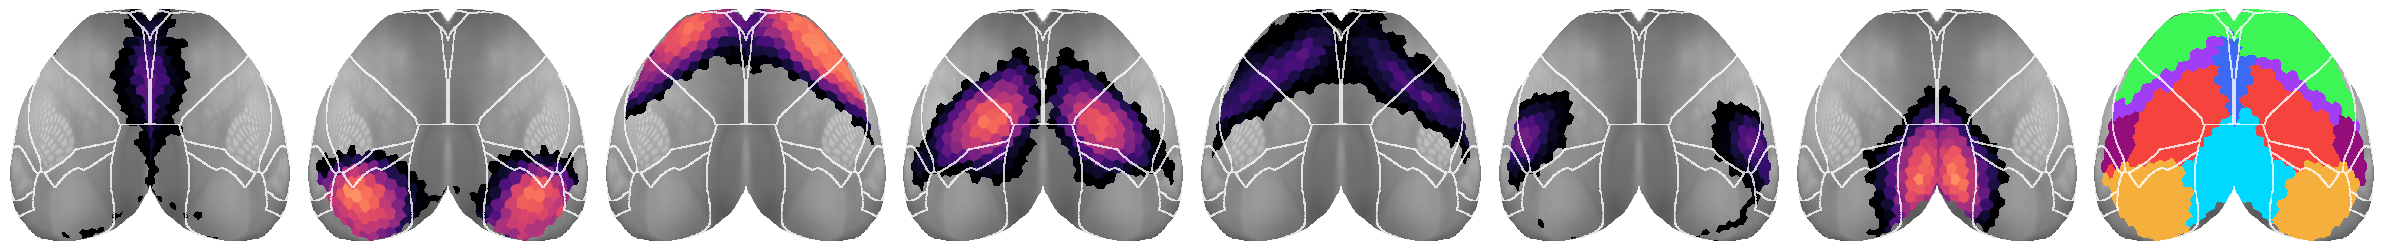

In [13]:
kws_show.update(dict(
    add_ylabels=False,
    titles=False,
    display=False,
))
fig, axes = bs.show(pi_unfiltered, **kws_show)

fig.savefig(pjoin(fig_dir, 'unfiltered_kaba.png'), **kws_fig)
display(fig)

## 4. Full range

In [14]:
pi_avg = np.load(
    pjoin(tmp_dir, 'memberships_avg.npy'),
    allow_pickle=True,
).item()

pi_avg = {
    k: pi_avg.get(k) for k in
    [f"preproc\n{m}" for m in prepare_palette()]
}

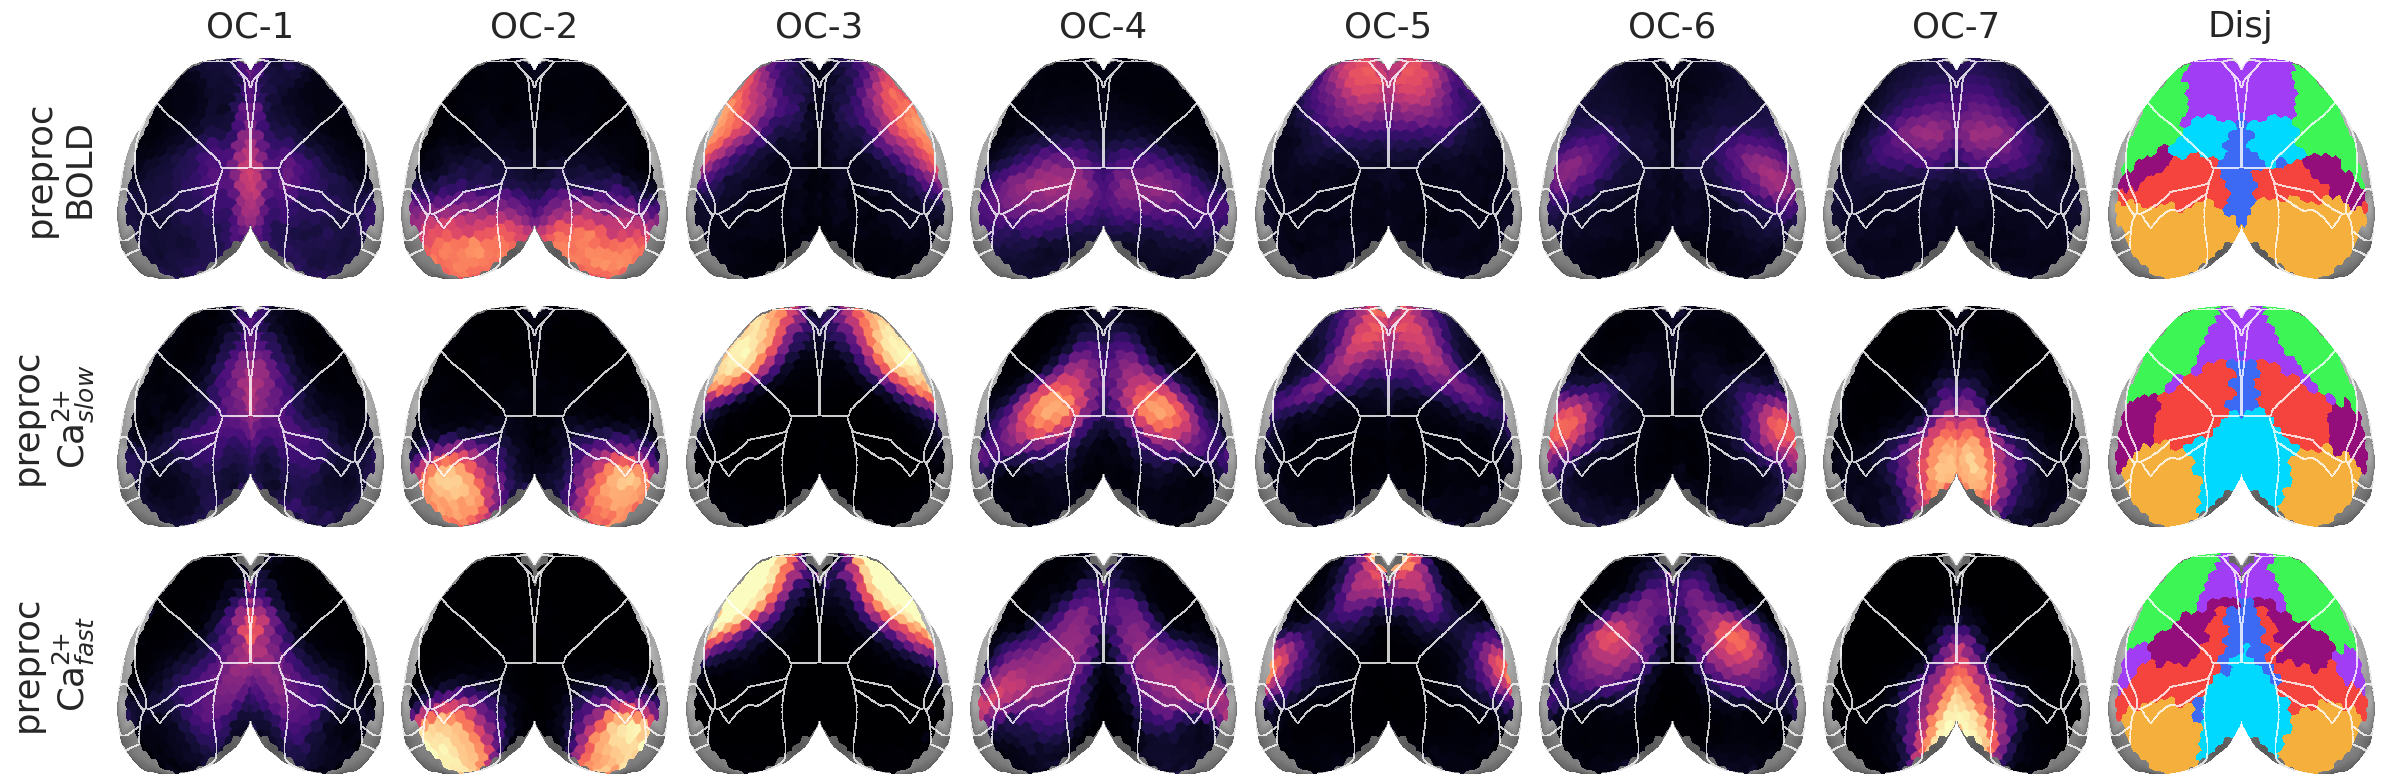

In [15]:
kws_show.update(dict(
    add_ylabels=True,
    titles=True,
    display=True,
    vmin=0,
    mask_thresh=1e-9,
))
fig, axes = bs.show(pi_avg, **kws_show)

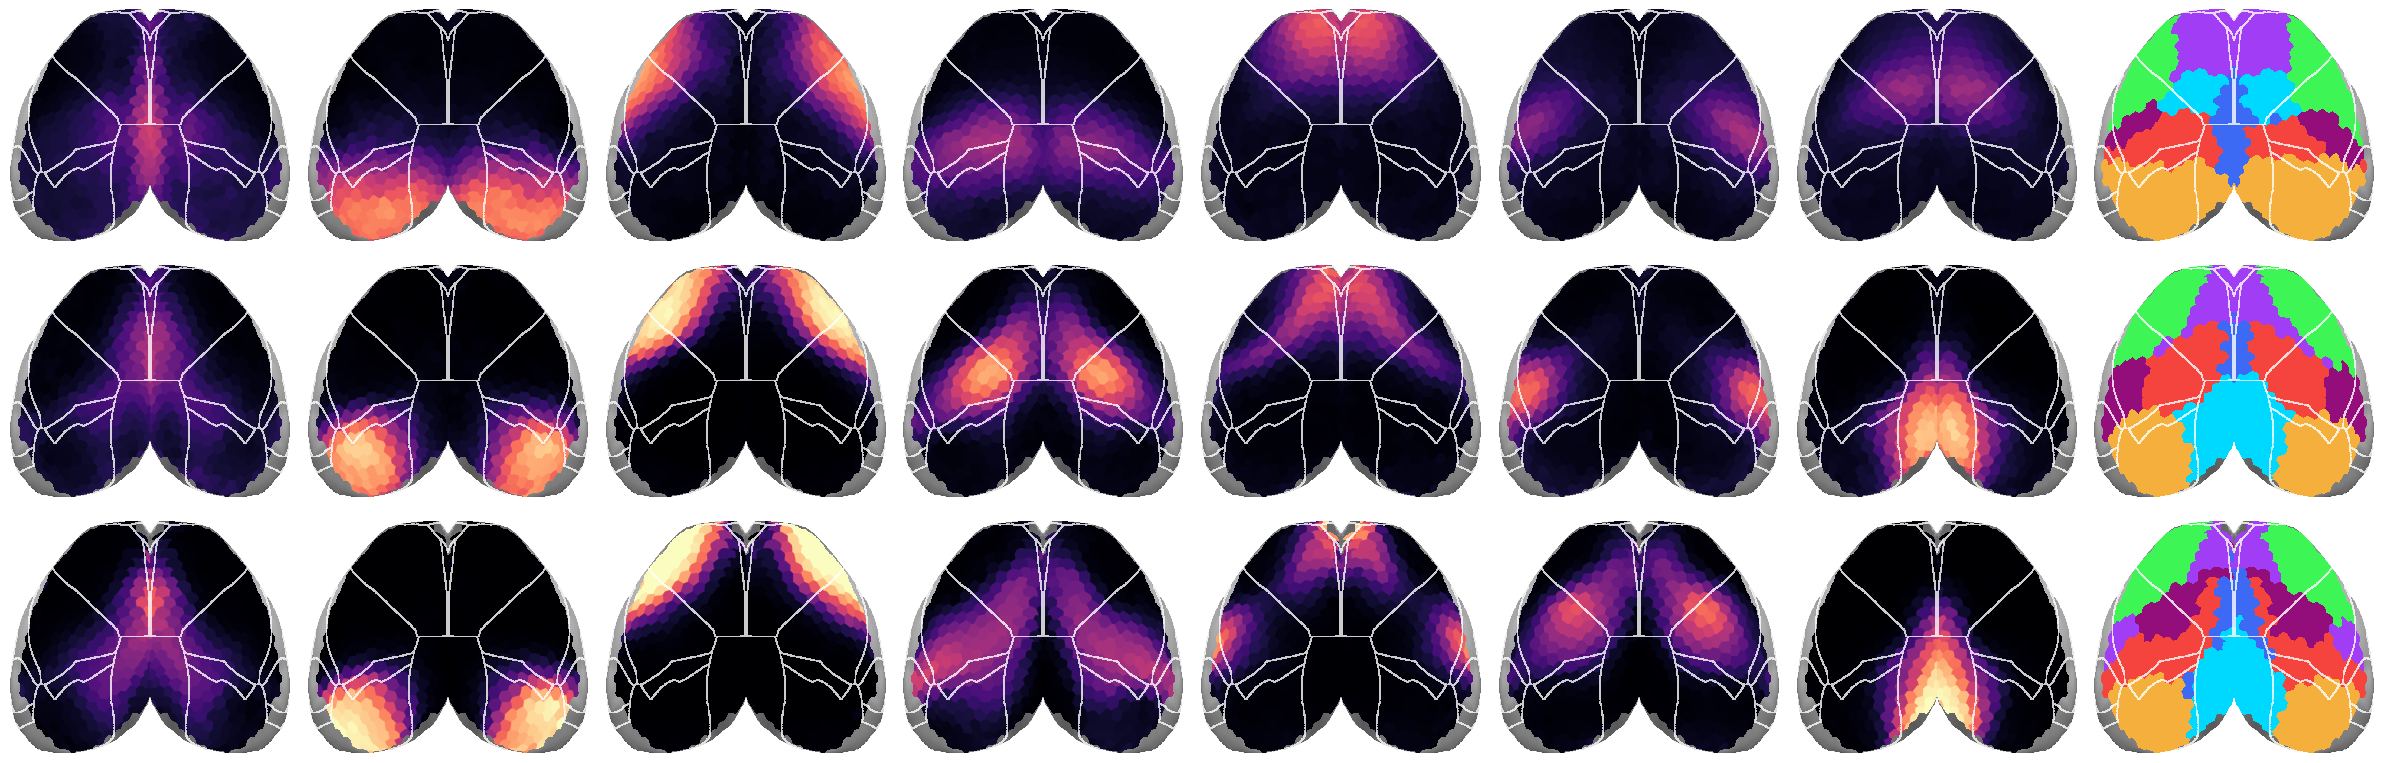

In [16]:
kws_show.update(dict(
    add_ylabels=False,
    titles=False,
    display=False,
    vmin=0,
    mask_thresh=1e-9,
))
fig, axes = bs.show(pi_avg, **kws_show)

fig.savefig(pjoin(fig_dir, 'fullrange_kaba.png'), **kws_fig)
display(fig)